# Задание на практику
1. Загрузить данные из файла “insurance.csv”.
2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы.
3. Построить гистограммы для числовых показателей. Сделать выводы.
4. Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.
5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.
6. Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных
распределений. Сделать выводы.
7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.
8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.
9. Оформить отчет на основе проделанной работы. Написать выводы.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("../data/insurance.csv")
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

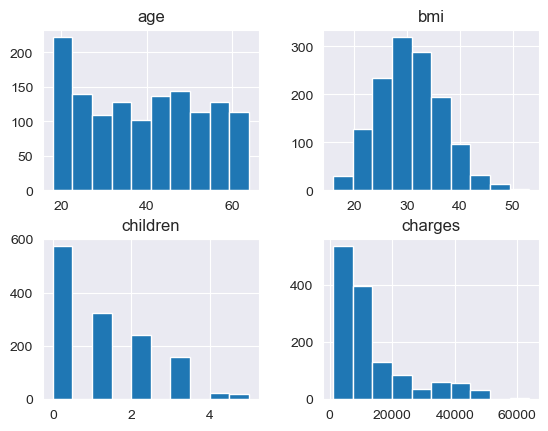

In [4]:
data.hist()

In [5]:
import scipy.stats as sts

In [6]:
cols = ['bmi', 'charges']
result = {}
for col in cols:
    column = data[col]
    result[col] = pd.DataFrame([ column.mean(), column.mode().values[0],
        column.median(),  sts.iqr(column, interpolation='midpoint'),
        column.max() - column.min(), column.std()
    ], index=['mean', 'mode', 'median', 'iqr', 'scope', 'std'])
    print('Name: ' + col, result[col], sep='\n', end='\n\n')

Name: bmi
                0
mean    30.663397
mode    32.300000
median  30.400000
iqr      8.385000
scope   37.170000
std      6.098187

Name: charges
                   0
mean    13270.422265
mode     1639.563100
median   9382.033000
iqr     11879.801480
scope   62648.554110
std     12110.011237



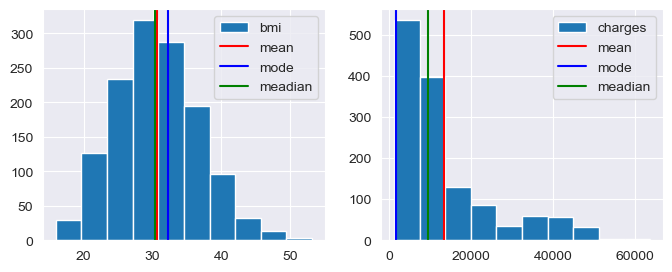

In [7]:
plt.figure(figsize=(8, 3))
for i, col in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    data[col].hist(legend=True)
    params = ['mean', 'mode', 'meadian']
    colors = ['r', 'b', 'g']
    for j in range(3):
        plt.axvline(x = result[col].iloc[j].values[0], color = colors[j], label = params[j])
    plt.legend()

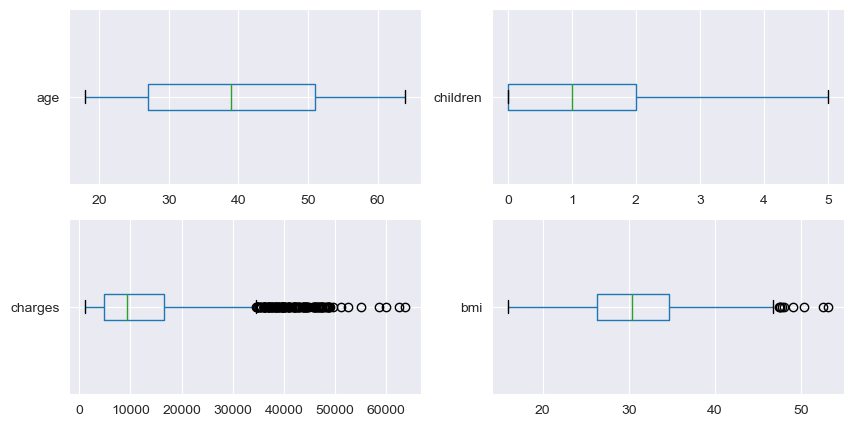

In [8]:
columns = ['age', 'children', 'charges', 'bmi']
plt.figure(figsize=(10, 5))
for index, column in enumerate(columns):
    plt.subplot(2, 2, index + 1)
    pd.DataFrame(data[column]).boxplot(vert=False)

30.663396860986538


Text(5.569444444444445, 0.5, 'Probability Density')

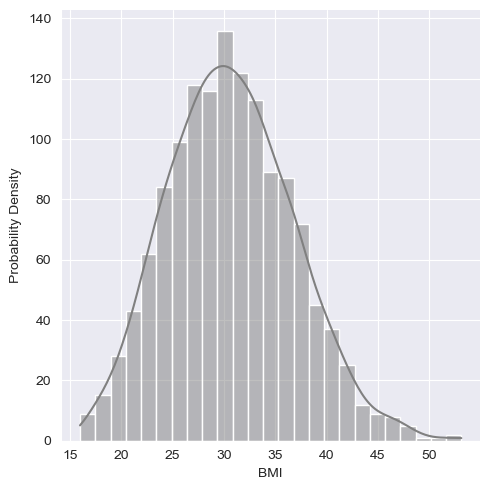

In [9]:
bmi = data['bmi']
print(bmi.mean())
sns.displot(bmi, color='grey', kde=True)
plt.xlabel('BMI')
plt.ylabel('Probability Density')

In [10]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
def calc_sample_mean(sample_size):
    mean_values = []
    for _ in range(300):
        sample_mean = bmi.sample(n=sample_size).mean()
        mean_values.append(sample_mean)
    print('std=' + str(np.std(mean_values)), 'mean=' + str(np.mean(mean_values)), sep=', ')
    return mean_values

[ 100  147  194  242  289  336  384  431  478  526  573  621  668  715
  763  810  857  905  952 1000]
0 std=0.5567695843788675, mean=30.6939765
1 std=0.4848003063214913, mean=30.70271281179139
2 std=0.4069423965300498, mean=30.674106443298975
3 std=0.346192282611053, mean=30.658749517906337
4 std=0.314846656145009, mean=30.64616712802768
5 std=0.267680093094999, mean=30.68010357142857
6 std=0.2883001250165306, mean=30.684231336805553
7 std=0.24620931269024537, mean=30.644029234338742
8 std=0.21058259347714436, mean=30.652086610878655
9 std=0.19167926321881112, mean=30.65682978453738
10 std=0.19633785580674137, mean=30.664828097731224
11 std=0.17510733196636216, mean=30.65847726784755
12 std=0.1785679651031522, mean=30.66087961576845
13 std=0.15073489084303818, mean=30.651990372960356
14 std=0.14424732615886438, mean=30.671720773263417
15 std=0.1346026702474102, mean=30.66613224279834
16 std=0.12364078451656912, mean=30.673312213146627
17 std=0.11140507977621399, mean=30.67023957642724

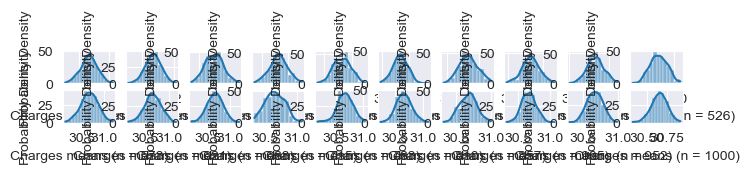

In [18]:
sizes = np.linspace(100, 1000, 20, dtype=int)
print(sizes)
plt.figure(figsize=(8, 5))
for index, size in enumerate(sizes):
    print(index, end=' ')
    plt.subplot(int(sizes.size / 2), int(sizes.size / 2), index + 1)
    sns.histplot(calc_sample_mean(sample_size=size), kde=True)
    plt.xlabel(f'Charges means (n = ' + str(size) + ')')
    plt.ylabel('Probability Density')

In [12]:
def trust_interval(df, coef):
    return [df.mean() - coef * df.std() / np.sqrt(df.size), df.mean() + coef * df.std() / np.sqrt(df.size)]
bmi, charges = data['bmi'], data['charges']
trust_interval(bmi, 1.96), trust_interval(charges, 1.96)

([30.336636967245084, 30.99015675472799],
 [12621.53005468252, 13919.314475599993])

In [13]:
trust_interval(bmi, 2.58), trust_interval(charges, 2.58)

([30.233274143714624, 31.09351957825845],
 [12416.268233006796, 14124.576297275717])

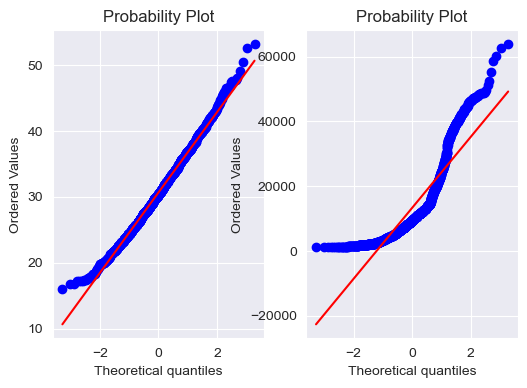

In [14]:
import scipy.stats as stats
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
stats.probplot(bmi, dist='norm', plot=plt)
plt.subplot(1, 2, 2)
stats.probplot(charges, dist='norm', plot=plt)
plt.show()

In [15]:
stats.kstest((bmi - bmi.mean()) / bmi.std(), 'norm'), \
stats.kstest((charges - charges.mean()) / charges.std(), 'norm')

(KstestResult(statistic=0.026099881197044095, pvalue=0.3162798242838347),
 KstestResult(statistic=0.18846450965981876, pvalue=4.381949677777384e-42))